In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for debug
%load_ext autoreload
%autoreload 2
import os
os.environ["OMP_NUM_THREADS"] = "10"

data_path='/dybfs2/nEXO/fuys/others/sw_work/'
plt.style.use("/afs/ihep.ac.cn/users/f/fuys/.config/matplotlib/Paper.mplstyle")

In [48]:
raw_data_path = "/dybfs2/nEXO/fuys/others/sw_work/data/Tick_data_20230606/20200407.parquet"

raw_data = pd.read_parquet(raw_data_path)


In [54]:
import math
last_p_o = raw_data['lastprice']
last_p = raw_data['lastprice'].astype(np.float32)
diff = last_p - last_p.shift(1)
# print(last_p)

test = np.array(list(set(diff)))
print(test)

filtered_list = np.array([x.round(3) for x in test if not math.isnan(x)])
print(filtered_list.round(3))


[        nan  0.04499817  0.         -0.00500488  0.00500488 -0.01000214
  0.01499939 -0.00499725  0.01000214  0.00499725 -0.01499939  0.02000427
  0.00999451 -0.00999451 -0.02000427  0.02500153 -0.02500153 -0.01999664
  0.01999664 -0.02999878  0.03500366  0.03499603]
[ 0.045  0.    -0.005  0.005 -0.01   0.015 -0.005  0.01   0.005 -0.015
  0.02   0.01  -0.01  -0.02   0.025 -0.025 -0.02   0.02  -0.03   0.035
  0.035]


In [11]:

data_path = "/dybfs2/nEXO/fuys/others/sw_work/data/ic_results_data/\
All_factor_data_v1/type_All_factor_and_return_1_min_back_1_min_normal_ic_20210524.h5"

data = pd.read_hdf(data_path)



In [13]:
a = data['return']
# print(a)
# print(a.round(3))
c = a.round(3)
print(c[0]-0.005)
# print(c==0.005)

-1.1175870905794083e-10


0        0.000
1        0.005
2        0.015
3        0.000
4        0.005
         ...  
20768    0.020
20769    0.010
20770    0.010
20771    0.015
20772    0.015
Name: return, Length: 20773, dtype: float32
[0.0, 0.004999999888241291, 0.014999999664723873, -0.009999999776482582, -0.004999999888241291, -0.014999999664723873, -0.019999999552965164, -0.02500000037252903, -0.029999999329447746, -0.03999999910593033, -0.03500000014901161, -0.05000000074505806, -0.04500000178813934, -0.054999999701976776, -0.05999999865889549, -0.06499999761581421, -0.07000000029802322, -0.07500000298023224, 0.009999999776482582, 0.019999999552965164, 0.02500000037252903, 0.029999999329447746, 0.03999999910593033, 0.04500000178813934, 0.03500000014901161]
[5848, 3931, 792, 1842, 4221, 760, 310, 155, 76, 27, 34, 20, 13, 4, 5, 2, 7, 4, 2259, 335, 88, 23, 7, 1, 9]


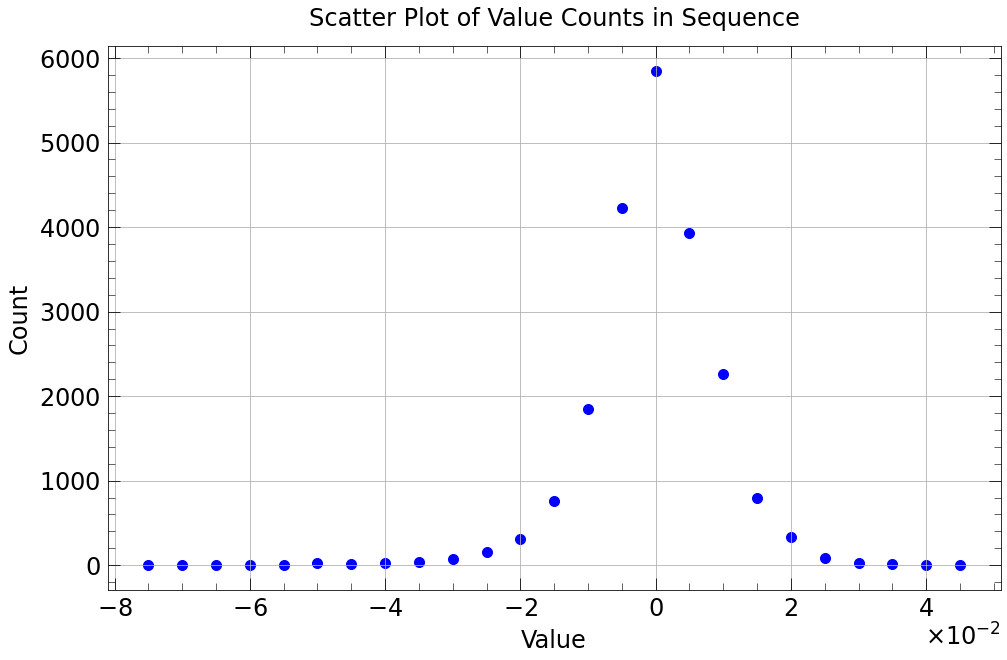

In [57]:

from collections import Counter

# 您的序列
a = data['return']
print(a.round(3))
# 使用Counter来计算每个值的出现次数
value_counts = Counter(a.round(3))

# 提取值和相应的计数
values = list(value_counts.keys())
counts = list(value_counts.values())
print(values)
print(counts)

# 绘制散点图
plt.scatter(values, counts, marker='o', color='b')
# plt.hist(a,alpha=0.3,bins=np.arange(-0.08,0.08,0.005))
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Scatter Plot of Value Counts in Sequence')
plt.grid(True)

plt.show()


[[ 1.         -0.09798252]
 [-0.09798252  1.        ]]
[[1.         0.01615637]
 [0.01615637 1.        ]]
896
1134
1057
775


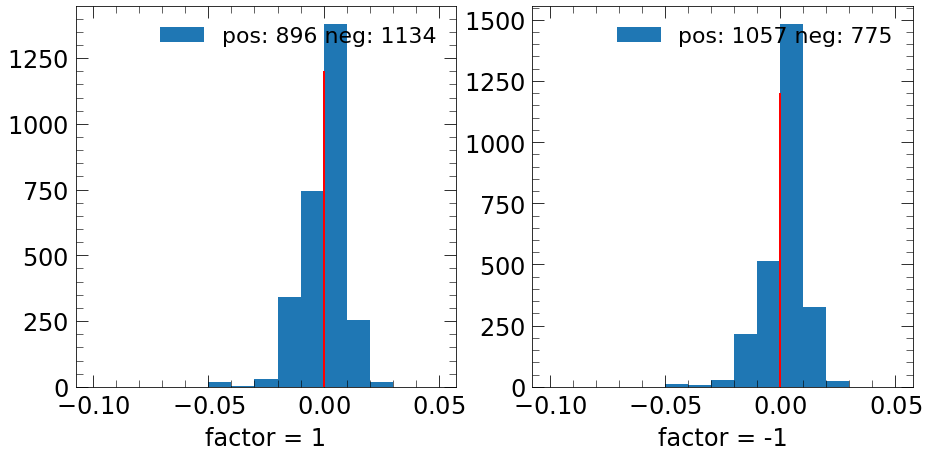

In [39]:
import random
vol = data['snapshot_direct_imbalance_vol2']
R = data['return']

re = R[vol.notna()]
factor = vol.dropna()

random_f = [random.choice([1, -1]) for _ in range(len(factor))]

corr = np.corrcoef(factor, re)
corrt = np.corrcoef(random_f, re)
print(corr)
print(corrt)

fig,ax = plt.subplots(figsize=(15,7),nrows=1, ncols=2)

# plt.plot(vol,'.')
# plt.plot(re, vol,'.')

pos = re[vol==1]
neg = re[vol==-1]

print((pos>0).sum())
print((pos<0).sum())
print((neg>0).sum())
print((neg<0).sum())
ax[0].hist(pos,bins=np.arange(-0.1,0.05,0.01),label="pos: %s neg: %s"%((pos>0).sum(),(pos<0).sum()))
ax[1].hist(neg,bins=np.arange(-0.1,0.05,0.01),label="pos: %s neg: %s"%((neg>0).sum(),(neg<0).sum()))
ax[0].vlines(0,0,1200,color='red')
ax[1].vlines(0,0,1200,color='red')
ax[0].set_xlabel('factor = 1')
ax[1].set_xlabel('factor = -1')
ax[0].legend()
ax[1].legend()
# plt.hist2d(factor, re)

